In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.2'

In [2]:
loaded_model = tf.keras.models.load_model(r'D:\github\2-Experiments\Malaria-Detection\model-Malaria-Detection-xception')
loaded_model.summary()
#x = tf.random.uniform((10, 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# import sys
# from PIL import Image
# sys.modules['Image'] = Image 

In [31]:
# from PIL import Image
# print(Image.__file__)

d:\Users\admin\anaconda3\envs\malariapred\lib\site-packages\PIL\Image.py


<Figure size 360x360 with 0 Axes>

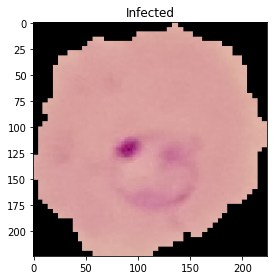

In [4]:
f = r'D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.figure(figsize=(5,5))

img1 = image.load_img(f, target_size=(224, 224))

img = image.load_img(f, target_size=(71, 71))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)
prediction = loaded_model.predict(img_preprocessed)

if prediction<.1:
  title = "Infected"
else:
  title = "Uninfected"

fig, ax1 = plt.subplots(1,1)
ax1.set_title(title)

plt.imshow(img1)
plt.tight_layout()


In [7]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
 
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    def get_prediction(self):
        s=loaded_model.predict(img_preprocessed)
        if(s==[[1.]]):
            self.label.configure(text="non parasitic")
        else:
            self.label.configure(text="parasitic") 
root = Root()
root.mainloop()

In [8]:
!pip install streamlit

^C


In [10]:
import cv2
import os
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models,utils
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras import utils

In [ ]:
current_path = os.getcwd()
dog_breeds_category_path = os.path.join(current_path, 'static\dog_breeds_category.pickle')
predictor_model = load_model(r'static\dogbreed.h5')

# getting the current path
f = r'D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png'

# loading class_to_num_category
loaded_model = tf.keras.models.load_model(r'D:\github\2-Experiments\Malaria-Detection\model-Malaria-Detection-xception')
with open(f, 'rb') as handle:
    dog_breeds = predictor_model.predict(handle)

# loading the feature extractor model

#feature_extractor = load_model(r'static\feature_extractor.h5')

In [ ]:
def predictor(img_path): # here image is file name 
    img = load_img(img_path, target_size=(331,331))
    img = img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    features = feature_extractor.predict(img)
    prediction = predictor_model.predict(features)*100
    prediction = pd.DataFrame(np.round(prediction,1),columns = dog_breeds).transpose()
    prediction.columns = ['values']
    prediction  = prediction.nlargest(5, 'values')
    prediction = prediction.reset_index()
    prediction.columns = ['name', 'values']
    return(prediction)

In [13]:
#from helper import *
#importing all the helper fxn from helper.py which we will create later
import streamlit as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set()
from PIL import Image
st.title('Dog Breed Classifier')

2022-07-26 17:46:52.686 
  command:

    streamlit run d:\Users\admin\anaconda3\envs\malariapred\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('static/images',uploaded_file.name),'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1    
    except:
        return 0

In [ ]:
uploaded_file = st.file_uploader("Upload Image")
# text over upload button "Upload Image"
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file): 
        # display the image
        display_image = Image.open(uploaded_file)
        st.image(display_image)
        prediction = predictor(os.path.join('static/images',uploaded_file.name))
        os.remove('static/images/'+uploaded_file.name)
        # deleting uploaded saved picture after prediction
        # drawing graphs
        st.text('Predictions :-')
        fig, ax = plt.subplots()
        ax  = sns.barplot(y = 'name',x='values', data = prediction,order = prediction.sort_values('values',ascending=False).name)
        ax.set(xlabel='Confidence %', ylabel='Breed')
        st.pyplot(fig)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

<Figure size 360x360 with 0 Axes>

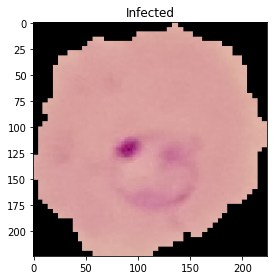

In [3]:
import tensorflow as tf
import streamlit as st 

from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt


loaded_model = tf.keras.models.load_model(r'model-Malaria-Detection-xception')
loaded_model.summary()
#x = tf.random.uniform((10, 3))

f = r'D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.figure(figsize=(5,5))

img1 = image.load_img(f, target_size=(224, 224))

img = image.load_img(f, target_size=(71, 71))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)
prediction = loaded_model.predict(img_preprocessed)

if prediction<.1:
  title = "Infected"
else:
  title = "Uninfected"

fig, ax1 = plt.subplots(1,1)
ax1.set_title(title)

plt.imshow(img1)
plt.tight_layout()



In [2]:
import tensorflow as tf
import streamlit as st 
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def load_model():
    loaded_model = tf.keras.models.load_model(r'model-Malaria-Detection-xception')
    # loaded_model.summary()
    #x = tf.random.uniform((10, 3))
    return loaded_model

file1 = st.file_uploader('Upload an Image')
filePath = st.text_input(label = "Please enter the path to the file" )

file1 = r'D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png'
with open(file1) as f:
    print("xxxxx",type(file1))

print("=!==",file1)
btn = st.button('Submit Image for Prediction')
if btn and file1!=None:
    print("!!!!",type(file1))
    with open(file1,"rb") as f:
        # f = r'D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png'
        # plt.figure(figsize=(5,5))

        # st.image(f)


        #img1 = image.load_img(f, target_size=(224, 224))
        img = image.load_img(f, target_size=(71, 71))
        print (img)
        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)
        img_preprocessed = preprocess_input(img_batch)

        loaded_model = load_model()
        prediction = loaded_model.predict(img_preprocessed)

        if prediction<.1:
            title = "Infected"
        else:
            title = "Uninfected"

        # fig, ax1 = plt.subplots(1,1)
        # ax1.set_title(title)

        # plt.imshow(img1)
        # plt.tight_layout()
        st.header("It is "+title)


2022-07-27 12:46:36.021 
  command:

    streamlit run d:\Users\admin\anaconda3\envs\malariapred\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


xxxxx <class 'str'>
=!== D:\github\2-Experiments\Malaria-Detection\C100P61ThinF_IMG_20150918_144104_cell_162.png
